<a href="https://colab.research.google.com/github/eneskrts/Sentiment-Analysis-on-E-comerce-Comments/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
import sys
#https://drive.google.com/file/d/1Z1UYoTyQWbIA2bLMJeTNA7-WGQFU8sn6/view?usp=sharing
sys.path.insert(0, 'drive/DeepLearning')

Mounted at /gdrive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = "https://drive.google.com/file/d/11aPGXXzT29WWVD30eIug8bBcEWDGjDYP/view?usp=sharing"
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('hb.csv') 

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import collections
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Veri setinin okunup gösterilmesi.

In [ ]:
df = pd.read_csv('hb.csv')
df.head()

,Rating (Star),Review,URL
0,5,3 yıldır tık demedi. :),https://www.hepsiburada.com/logitech-m175-kabl...
1,5,3 yıldır kullanıyorum müthiş,https://www.hepsiburada.com/logitech-m175-kabl...
2,4,Ürün bugün elime geçti çok fazla inceleme fırs...,https://www.hepsiburada.com/logitech-m175-kabl...
3,4,Almaya karar verdim. Hemencecik geldi. Keyifle...,https://www.hepsiburada.com/logitech-m175-kabl...
4,5,Günlük kullanımınızı çok çok iyi karsılıyor kı...,https://www.hepsiburada.com/logitech-m175-kabl...


Verimiz 272216 satır, 3 sütundan oluşmakta.

In [ ]:
df.shape

(272216, 3)

1 sütun integer, 2 sütun kategorik değerdedir. Veri setinde hiç eksik veri olmadığı görülmektedir.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272216 entries, 0 to 272215
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Rating (Star)  272216 non-null  int64 
 1   Review         272216 non-null  object
 2   URL            272216 non-null  object
dtypes: int64(1), object(2)
memory usage: 6.2+ MB


Url özelliği kullanılmayacağı için veri setinden çıkarıldı.


In [ ]:
df = df.iloc[:, [0, 1]]
df.head()

,Rating (Star),Review
0,5,3 yıldır tık demedi. :)
1,5,3 yıldır kullanıyorum müthiş
2,4,Ürün bugün elime geçti çok fazla inceleme fırs...
3,4,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,5,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [ ]:
df.columns

Index(['Rating (Star)', 'Review'], dtype='object')

In [ ]:
df.columns = ['rating', 'review']

Rating özelliğinin dağılımı gösterildi.

In [ ]:
df["rating"].value_counts()

5    167427
4     62394
3     28719
1      7226
2      6450
Name: rating, dtype: int64

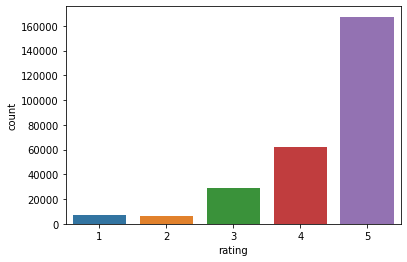

In [ ]:
sns.countplot(x='rating', data=df);

Verisetini dengelemek açısından 4 puan alan yorumlar kaldırıldı. 

In [ ]:
df = df[df.rating != 4]

In [ ]:
df["rating"].value_counts()

5    167427
3     28719
1      7226
2      6450
Name: rating, dtype: int64

1 ve 2 puanlılar kötü yorum, 3 puanlılar nötr yorum ve 5 puanlılar iyi yorum olarak değerlendirildi. Bu nedenle 1 ve 2 puan alan yorumlar -1, 3 puan alan yorumlar 0, 5 puan alan yorumlar 1 olarak etiketlendi.

In [ ]:
df["rating"] = [-1 if x == 1 else x for x in df["rating"]]
df["rating"] = [-1 if x == 2 else x for x in df["rating"]]
df["rating"] = [0 if x == 3 else x for x in df["rating"]]
df["rating"] = [1 if x == 5 else x for x in df["rating"]]

Verisetindeki dağılım dengesiz olduğundan, nötr ve iyi yorumlardan yirmi bin yorum alındı.

In [ ]:
df__1 = df[df.rating == -1]
df_0 = df[df.rating == 0]
df_1 = df[df.rating == 1]

In [ ]:
df_0 = df_0[:20000]
df_1 = df_1[:20000]

In [ ]:
df = pd.concat([df__1,df_0,df_1],axis=0,ignore_index=True)

In [ ]:
df["rating"].value_counts()

 1    20000
 0    20000
-1    13676
Name: rating, dtype: int64

Veri setinin dağılımını görmek için sütun grafiği oluşturuldu.

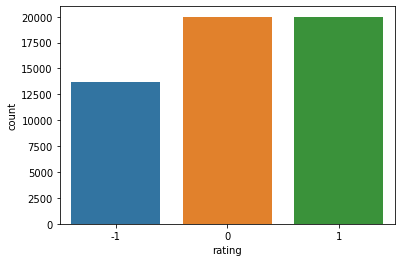

In [ ]:
sns.countplot(x='rating', data=df);

Veri setinin içindeki noktalama işaretleri ve sayılar kaldırıldı. Tüm harfler küçük harf formatında yazıldı.

In [ ]:
def preprocessingg(column):
    column=column.apply(lambda x: " ".join(x.lower() for x in x.split()))
    column=column.str.replace("[^\w\s]","")
    column=column.str.replace("[\d]","")
    return column

In [ ]:
df_p = df

In [ ]:
df_p["review"] = preprocessingg(df_p["review"])

In [ ]:
df_p.head()

,rating,review
0,-1,fiyatına göre ortalama bi mause oyun için alıy...
1,-1,ürün güzel lakin beklediğim kadar değil sağ tu...
2,-1,hesaplı ve kalıteli ürünler satıkları için ben...
3,-1,aydır mause kullanıyorum alıcısı ıyı kullanış...
4,-1,fiyat kalite olarak değerlendirdiğinizde güzel...


Cümleye anlam katmayan kelimeler verisetinden çıkarıldı

In [ ]:
sw = stopwords.words('turkish')

In [ ]:
df_p["review"] = df_p["review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [ ]:
df_p.head()

,rating,review
0,-1,fiyatına göre ortalama bi mause oyun alıyorsan...
1,-1,ürün güzel lakin beklediğim kadar değil sağ tu...
2,-1,hesaplı kalıteli ürünler satıkları ben memunum...
3,-1,aydır mause kullanıyorum alıcısı ıyı kullanışı...
4,-1,fiyat kalite olarak değerlendirdiğinizde güzel...


Preprocess işlemi biten veriseti üzerinde zemberek kütüphanesi ile kök bulma çalışması yapıldı ve verisetine özellik olarak eklendi

In [ ]:
link = "https://drive.google.com/file/d/1Z1UYoTyQWbIA2bLMJeTNA7-WGQFU8sn6/view?usp=sharing"
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('_lemma.csv') 

In [ ]:

df_lemma = pd.read_csv('_lemma.csv')
df_lemma.head()

,rating,review,review_lemma
0,-1,fiyatına göre ortalama bi mause oyun alıyorsan...,fiyat göre ortalama bi mause oyun al dene stan...
1,-1,ürün güzel lakin beklediğim kadar değil sağ tu...,ürün güzel lakin bekle kadar değil sağ tuş bir...
2,-1,hesaplı kalıteli ürünler satıkları ben memunum...,hesap kalıteli ürün satık ben memun site tşk e...
3,-1,aydır mause kullanıyorum alıcısı ıyı kullanışı...,ay mause kullan al ı kullan kolay bazen sol tı...
4,-1,fiyat kalite olarak değerlendirdiğinizde güzel...,fiyat kalite ol değer güzel bir ürün laptop ku...


Veriseti görselleştirme çalışmaları için, verisetinde en çok geçen 50 kelime ve kelimelerin kaç kere geçtiği tespit edildi. Bu kelimeler adetleriyle beraber bir dataframe olarak tutuldu.

In [ ]:
def birlestirme(datafrm):
  x =  " ".join(i for i in datafrm.review_lemma)
  word_counterr = collections.Counter(x.split())
  lstt = word_counterr.most_common(50)
  most_common_words = []
  for i in lstt:
    if len(i[0])>=3 and i[0] not in ['bir','ürün']:
      most_common_words.append(i)
  df = pd.DataFrame(most_common_words,columns=["review_lemma","count"])
  return df


En çok geçen kelimeler ve adetlerinin bulunduğu dataframe kullanılarak; pozitif yorumlarda, nötr yorumlarda, negatif yorumlarda ve genel verisetinde en çok tekrar eden kelimeler barplot yöntemiyle görselleştirildi.

In [ ]:
def draw_barplot(data):
  sns.barplot(y="review_lemma",x="count",data=data)
  sns.set(rc={'figure.figsize':(18,8)});

In [ ]:
sum_review_lemma = birlestirme(df_lemma)
df_pozitif = birlestirme(df_lemma[df_lemma["rating"] == 1 ])
df_nötr = birlestirme(df_lemma[df_lemma["rating"] == 0 ])
df_negatif = birlestirme(df_lemma[df_lemma["rating"] == -1 ])

Pozitif yorumlar

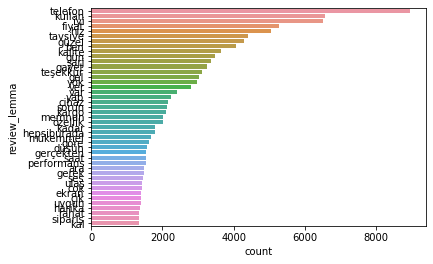

In [ ]:
draw_barplot(data=df_pozitif)

Nötr yorumlar

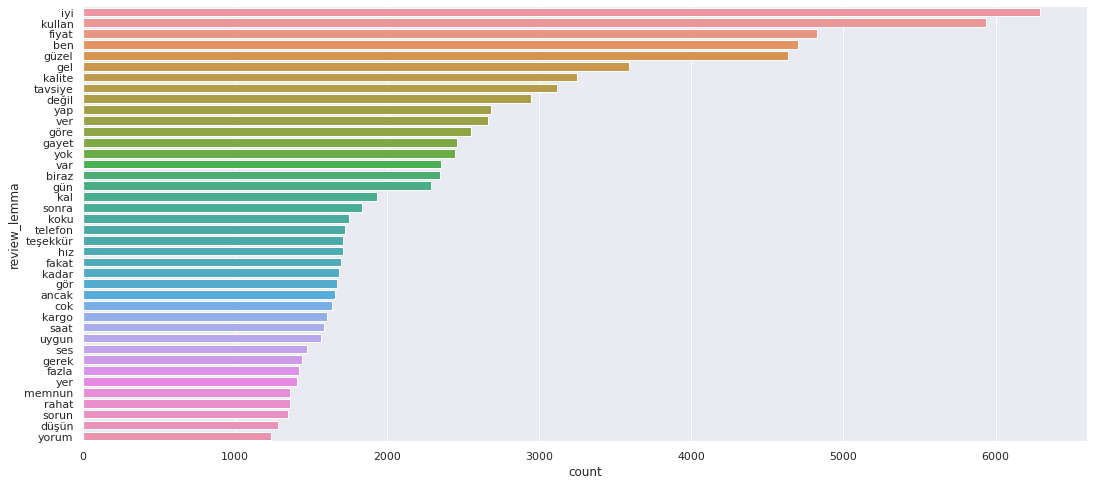

In [ ]:
draw_barplot(data=df_nötr)

Negatif yorumlar

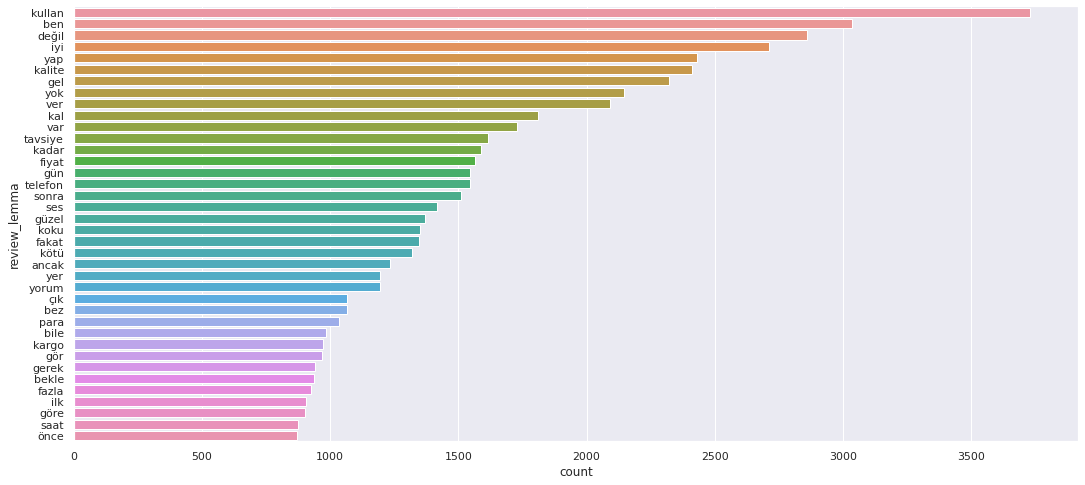

In [ ]:
draw_barplot(data=df_negatif)

Genel veriseti

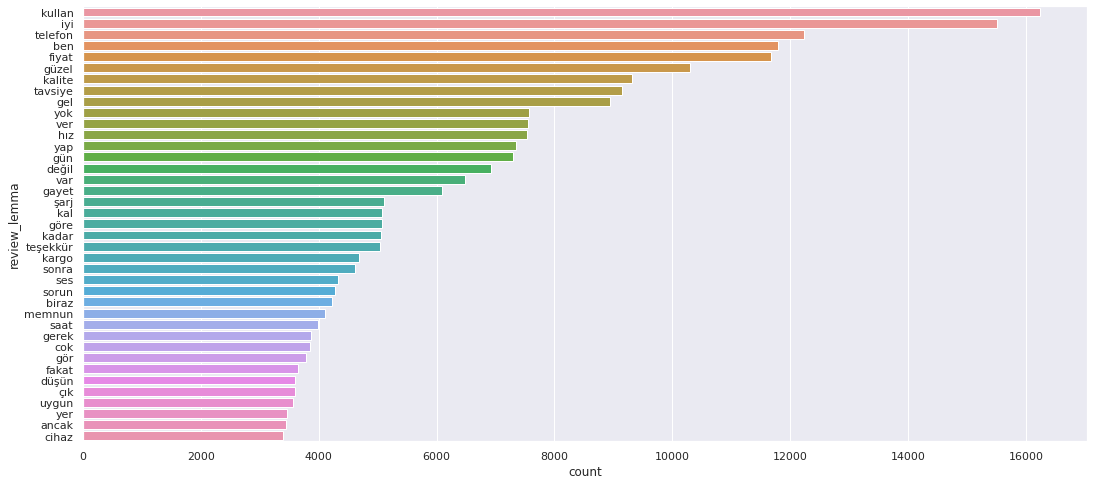

In [ ]:
draw_barplot(sum_review_lemma)

Her yorumun kaç kelimeden oluştuğu belirlenerek verisetine özellik olarak eklendi ve görselleştirildi

In [ ]:
df_lemma["word_count"] = df_lemma["review_lemma"].apply(lambda x: len(x.split()))

In [ ]:
def draw_hist(data):
  data[data["word_count"] < 50 ].hist(column=["word_count"]);

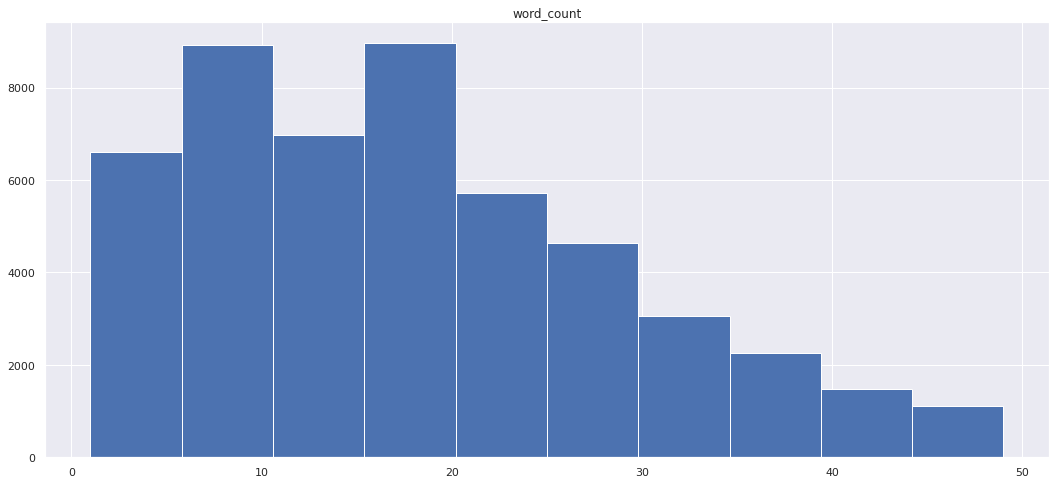

In [ ]:
draw_hist(df_lemma)

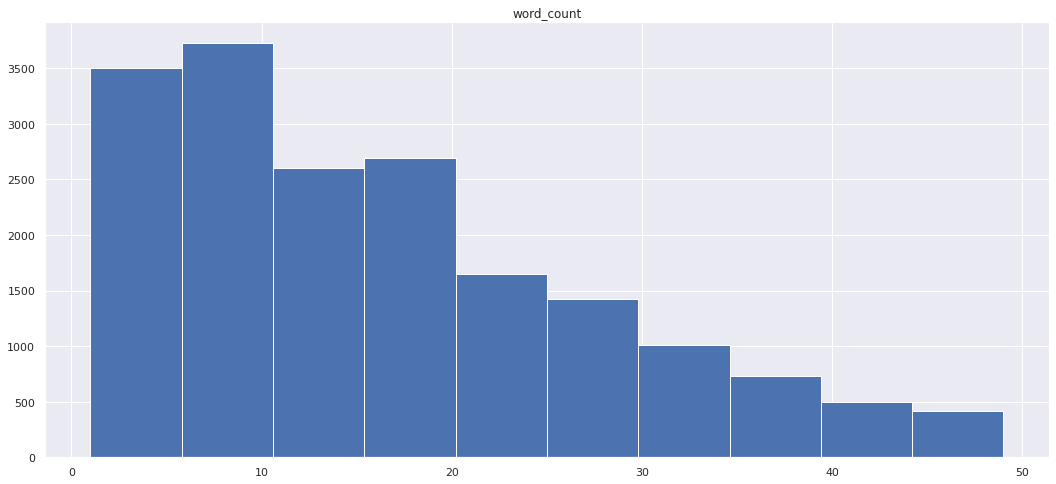

In [ ]:
draw_hist(df_lemma[df_lemma["rating"] == 1 ])

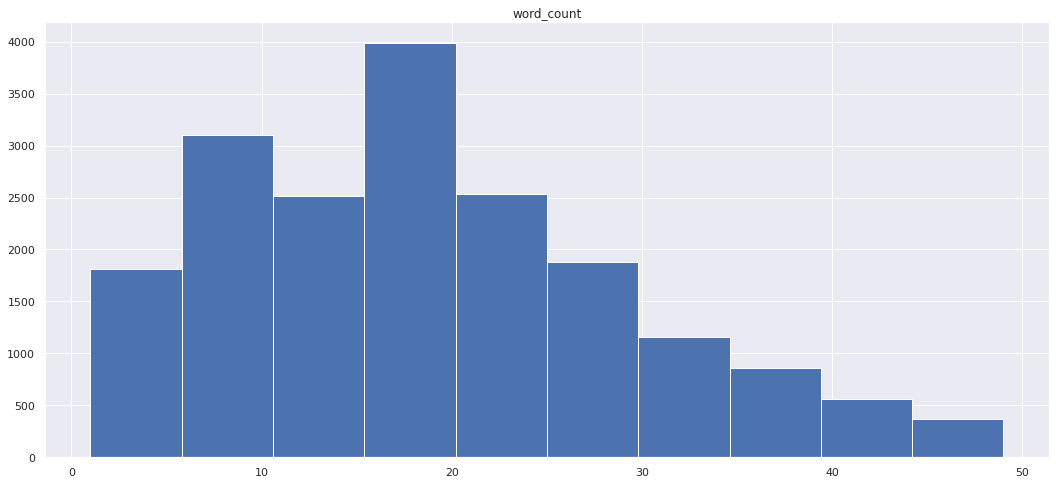

In [ ]:
draw_hist(df_lemma[df_lemma["rating"] == 0 ])

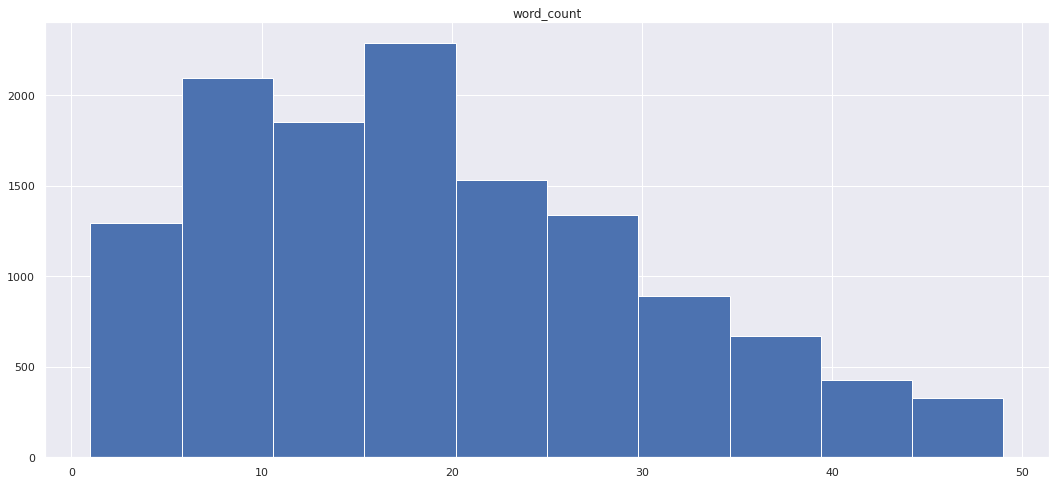

In [ ]:
draw_hist(df_lemma[df_lemma["rating"] == -1 ])

Genel veriseti ve yorum kategorileri wordcloud işlemi ile görselleştirildi

In [ ]:
def draw_wordcloud(data):
  text = " ".join(i for i in data.review_lemma)
  text = " ".join(i for i in text.split() if len(i) >= 3)
  wc = WordCloud(max_words=50,background_color="white").generate(text)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.show()

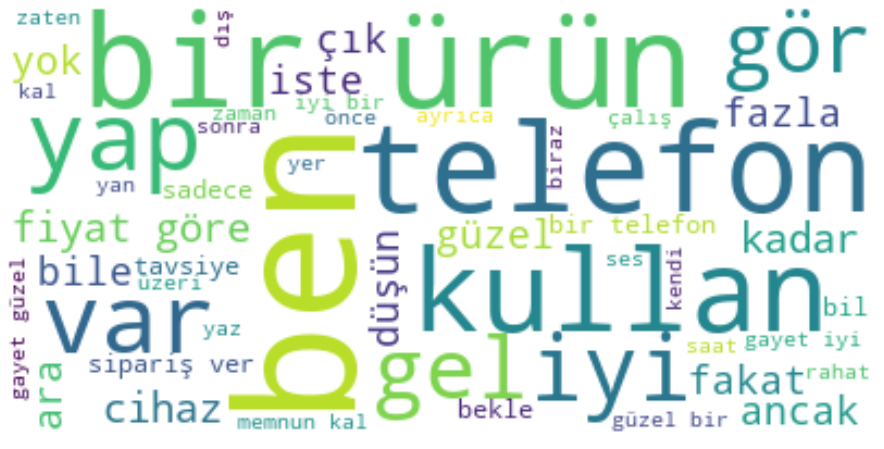

In [ ]:
draw_wordcloud(df_lemma)

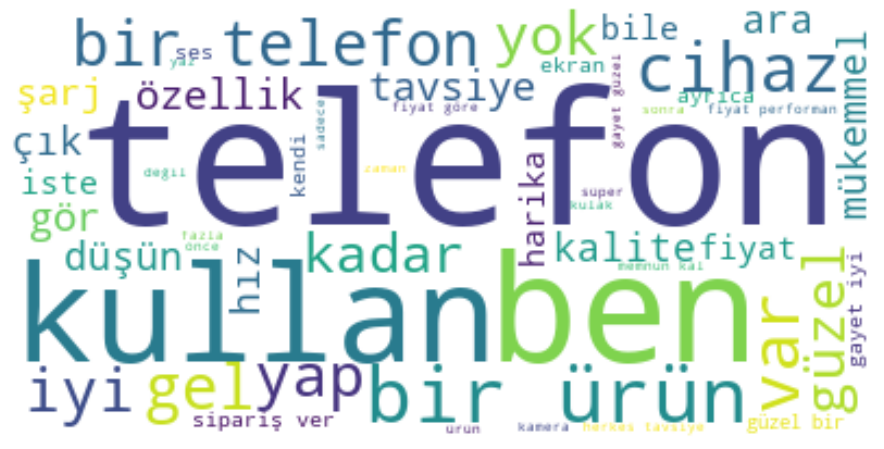

In [ ]:
draw_wordcloud(df_lemma[df_lemma["rating"] == 1 ])

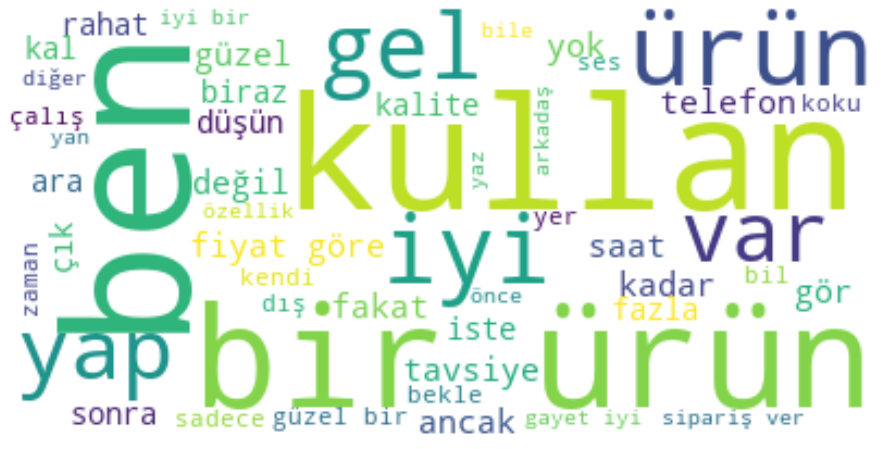

In [ ]:
draw_wordcloud(df_lemma[df_lemma["rating"] == 0 ])

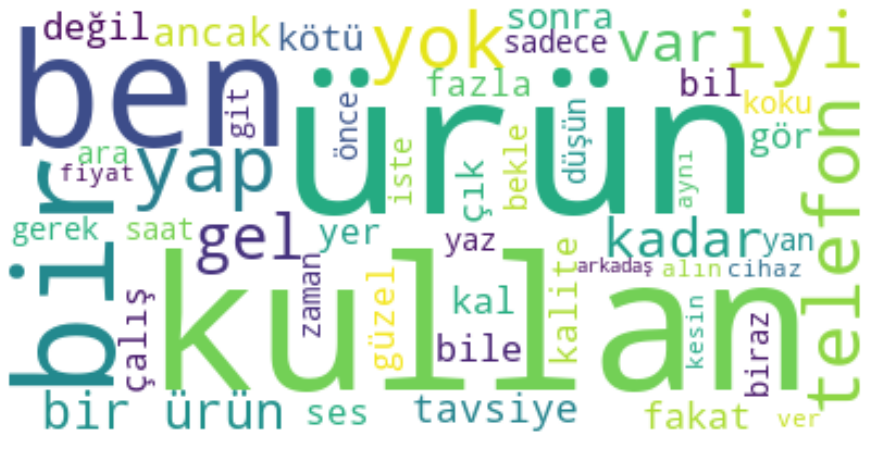

In [ ]:
draw_wordcloud(df_lemma[df_lemma["rating"] == -1 ])

In [ ]:
#train-test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.pooling import GlobalMaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.layers import *
from keras import backend
from sklearn.metrics import f1_score, confusion_matrix

In [ ]:
class AttentionWithContext(Layer):

    def __init__(self, W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None,
                 bias=True, **kwargs):

        self.supports_masking = True
        self.init = glorot_uniform()

        self.W_regularizer = regularizers.get(W_regularizer)
        self.u_regularizer = regularizers.get(u_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.u_constraint = constraints.get(u_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)

        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_u'.format(self.name),
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint)

        super(AttentionWithContext, self).build(input_shape)

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        uit = dot_product(x, self.W)

        if self.bias:
            uit += self.b

        uit = K.tanh(uit)
        ait = dot_product(uit, self.u)

        a = K.exp(ait)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

def dot_product(x, kernel):


    if K.backend() == 'tensorflow':
        return K.squeeze(K.dot(x, K.expand_dims(kernel)), axis=-1)
    else:
        return K.dot(x, kernel)

NameError: ignored

Veri seti train ve test olarak ayrıldı.

In [ ]:
def train_test(data_x,data_y,testsize,randomstate):
  x_train, x_test, y_train, y_test = train_test_split(data_x,data_y,test_size=testsize,random_state=randomstate)
  return x_train, x_test, y_train, y_test

In [ ]:
link = "https://drive.google.com/file/d/1Z1UYoTyQWbIA2bLMJeTNA7-WGQFU8sn6/view?usp=sharing"
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('_lemma.csv') 

In [ ]:
df_lemma = pd.read_csv('_lemma.csv')
df_lemma

,rating,review,review_lemma
0,-1,fiyatına göre ortalama bi mause oyun alıyorsan...,fiyat göre ortalama bi mause oyun al dene stan...
1,-1,ürün güzel lakin beklediğim kadar değil sağ tu...,ürün güzel lakin bekle kadar değil sağ tuş bir...
2,-1,hesaplı kalıteli ürünler satıkları ben memunum...,hesap kalıteli ürün satık ben memun site tşk e...
3,-1,aydır mause kullanıyorum alıcısı ıyı kullanışı...,ay mause kullan al ı kullan kolay bazen sol tı...
4,-1,fiyat kalite olarak değerlendirdiğinizde güzel...,fiyat kalite ol değer güzel bir ürün laptop ku...
...,...,...,...
53671,1,samsung kalitesi olsun,samsung kalite ol
53672,1,güzel bir telefon bir haftadır kullanıyorum ta...,güzel bir telefon bir hafta kullan tavsiye et
53673,1,samsungun böyle zarif bir telefon üretebileceğ...,samsung böyle zarif bir telefon üre düşün el a...
53674,1,hafta oldu alali telefon karsilastirma siteler...,hafta ol alali telefon karsilastirma site bakt...


In [ ]:
from numpy import array
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SpatialDropout1D, Dropout, Convolution1D
from tensorflow.keras.layers import Flatten,  LSTM, GlobalMaxPooling1D
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.initializers import glorot_uniform

from tensorflow.keras.layers import Embedding
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from tensorflow.keras import regularizers,constraints
from nltk.corpus import stopwords
from tensorflow.keras import backend as K
import collections
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

nltk.download('stopwords')
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
label_encoder = LabelEncoder()

trained_lbl = label_encoder.fit_transform(df_lemma["rating"])
x_train, x_test, y_train, y_test = train_test(df_lemma["review_lemma"],trained_lbl,0.3,55)
#Y_train = to_categorical(y_train)
#Y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Tokenize our training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_lemma["review_lemma"])

document_count = tokenizer.document_count
vocab_size = len(tokenizer.word_index)

# Encode training data sentences into sequences
allDocs_sequences = tokenizer.texts_to_sequences(df_lemma["review_lemma"])

# Get max training sequence length
max_length = max([len(x) for x in allDocs_sequences])

# Get our training data word index
word_index = tokenizer.word_index
print("Corpus Summary") 
print("Word index:", word_index) 
print("document count  :", document_count)
print("vocabulary size :", vocab_size)
print("Maximum length of the statements :", max_length)

Corpus Summary
Word index: {'ol': 1, 'bir': 2, 'ürün': 3, 'al': 4, 'et': 5, 'telefon': 6, 'kullan': 7, 'iyi': 8, 'ben': 9, 'fiyat': 10, 'kalite': 11, 'tavsiye': 12, 'hız': 13, 'güzel': 14, 'gel': 15, 'yok': 16, 'gün': 17, 'ver': 18, 'yap': 19, 'de': 20, 'el': 21, 'var': 22, 'şarj': 23, 'değil': 24, 'gayet': 25, 'kadar': 26, 'teşekkür': 27, 'kal': 28, 'kargo': 29, 'sorun': 30, 'ses': 31, 'sonra': 32, 'memnun': 33, 'cihaz': 34, 'göre': 35, 'özellik': 36, 'çık': 37, 'gerek': 38, 'saat': 39, 'düşün': 40, 'iç': 41, 'ara': 42, 'bu': 43, 'cok': 44, 'hepsiburada': 45, 'gör': 46, 'yorum': 47, 'sipariş': 48, 'yer': 49, 'önce': 50, 'kesin': 51, 'uygun': 52, 'arkadaş': 53, 'iş': 54, 'bi': 55, 'fakat': 56, 'para': 57, 'gerçekten': 58, 'rahat': 59, 'bile': 60, 'biraz': 61, 'iste': 62, 'ekran': 63, 'zaman': 64, 'fazla': 65, 'ulaş': 66, 'performans': 67, 'süre': 68, 'mükemmel': 69, 'ancak': 70, 'git': 71, 'alın': 72, 'tam': 73, 'bekle': 74, 'çalış': 75, 'tek': 76, 'ilk': 77, 'geç': 78, 'kötü': 79, 'ay

In [ ]:
# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(x_train)

# Pad the training sequences
train_padded = pad_sequences(train_sequences, padding='post', truncating='post', maxlen=max_length)

# Output the results of our work
print("Train Doc Summary")
print("\nTraining sequences:\n", train_sequences[:5])
print("\nPadded training sequences:\n", train_padded[:5])
print("\nPadded training shape:", train_padded.shape)
print("Training sequences data type:", type(train_sequences))
print("Padded Training sequences data type:", type(train_padded))

Train Doc Summary

Training sequences:
 [[77, 549, 39, 504, 563, 1768, 78, 56, 1928, 424, 1505, 16, 6, 13, 2, 89, 1041, 5, 11288, 1214, 23, 1254, 34, 230, 1132, 12, 5], [3, 58, 11, 7], [8, 20], [1869, 212, 377, 1851, 3177, 1672, 3077, 32443], [13, 23, 5, 14, 3]]

Padded training sequences:
 [[  77  549   39 ...    0    0    0]
 [   3   58   11 ...    0    0    0]
 [   8   20    0 ...    0    0    0]
 [1869  212  377 ...    0    0    0]
 [  13   23    5 ...    0    0    0]]

Padded training shape: (23573, 257)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>


In [ ]:
# Encode training data sentences into sequences
test_sequences = tokenizer.texts_to_sequences(x_test)

# Pad the training sequences
test_padded = pad_sequences(test_sequences, padding='post', truncating='post', maxlen=max_length)

# Output the results of our work
print("Test Doc Summary")
print("\nTest sequences:\n", test_sequences[:5])
print("\nPadded test sequences:\n", test_padded[:5])
print("\nPadded test shape:", test_padded.shape)
print("Test sequences data type:", type(test_sequences))
print("Padded Test sequences data type:", type(test_padded))

Test Doc Summary

Test sequences:
 [[506, 199, 7, 220, 7415, 199, 7, 4974, 7416, 115, 37, 122, 2340, 26, 168, 26, 25, 14, 56, 115, 174, 712, 122, 1116, 552, 100, 57, 7417, 111, 2, 24, 530, 497, 1113, 1914, 86, 485, 293, 478, 122, 84, 571, 888, 191, 1, 4, 45, 284, 113, 216, 111, 81, 5900], [17, 145, 18680, 29, 18, 74, 7185, 5075, 525, 39, 29, 105, 4642, 2262, 921, 16, 248, 3081, 9, 181, 128, 26, 679, 13, 60, 90, 13, 15, 6526, 2924, 196, 9, 18681, 18682, 985, 22, 5151, 1, 93, 259, 74, 895, 1273, 93], [14], [9, 401, 33, 28, 531, 111, 6826, 4], [734, 341, 4, 1532, 170, 87, 7121, 251, 576, 7122, 131, 20, 824, 616, 11, 698, 341, 350, 7123, 165]]

Padded test sequences:
 [[  506   199     7 ...     0     0     0]
 [   17   145 18680 ...     0     0     0]
 [   14     0     0 ...     0     0     0]
 [    9   401    33 ...     0     0     0]
 [  734   341     4 ...     0     0     0]]

Padded test shape: (10103, 257)
Test sequences data type: <class 'list'>
Padded Test sequences data type: <cla

In [ ]:
input_dim = vocab_size+1
output_dim = 8

model = Sequential()
model.add(Embedding(input_dim, output_dim, input_length=max_length, name= 'embeded'))
model.add(SpatialDropout1D(0.25))
model.add(Convolution1D(16,3))
model.add(LSTM(16, return_sequences=True))
model.add(Convolution1D(16,5))

model.add(LSTM(8,return_sequences=True))
model.add(Dropout(0.25))
model.add(Dense(164, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

model.fit(train_padded, y_train, epochs=10, verbose=1)

loss, accuracy = model.evaluate(test_padded, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))


NameError: ignored

In [ ]:
input_dim = vocab_size+1
output_dim = 8

# define the model
model4 = Sequential()
model4.add(Embedding(input_dim, output_dim, input_length=max_length, name= 'embeded'))
model4.add(Dropout(0.50))
model4.add(Convolution1D(16,3))
model4.add(LSTM(16, return_sequences=True))
model4.add(Convolution1D(16,5))
model4.add(LSTM(16, return_sequences=True))
model4.add(GlobalMaxPooling1D())

model4.add(Dropout(0.50))

model4.add(Dense(16, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

# compile the model
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model4.summary())

# fit the model
model4.fit(train_padded, y_train, epochs=5, verbose=1)

# evaluate the model
loss, accuracy = model4.evaluate(test_padded, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeded (Embedding)          (None, 257, 8)            321840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 257, 8)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 255, 16)           400       
_________________________________________________________________
lstm_2 (LSTM)                (None, 255, 16)           2112      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 251, 16)           1296      
_________________________________________________________________
lstm_3 (LSTM)                (None, 251, 16)           2112      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)               

In [ ]:
input_dim = vocab_size+1
output_dim = 8
model = Sequential()
model.add(Embedding(input_dim, output_dim, input_length=max_length, name= 'embeded'))
#embed = Embedding(input_dim = vocab_size, output_dim = 16, input_length = max_length) 
#model.add(embed)
model.add(Bidirectional(CuDNNLSTM(200, return_sequences = True)))
model.add(Dropout(0.3))
model.add(AttentionWithContext())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()
model.fit(train_padded,y_train,epochs=5,batch_size=64,verbose=1)
loss, accuracy = model.evaluate(test_padded, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embeded (Embedding)          (None, 257, 8)            321840    
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 257, 400)          336000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 257, 400)          0         
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 400)               160800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               205312    
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 512)              

316/316 [==============================] - 4s 12ms/step - loss: 0.2766 - accuracy: 0.9045
Accuracy: 90.448380


In [ ]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                  300,
                  input_length=max_len))
model.add(SimpleRNN(100))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()
model.fit(train_padded,y_train,epochs=50,batch_size=64,verbose=1)

In [ ]:
!pip install transformers
import transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
import torch
from transformers import BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-128k-uncased', do_lower_case=True)

max_len = 250
encoded_data_train = tokenizer.batch_encode_plus(
    x_train, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)
# enes okula gitti, enesin kitabı kayıp,,, bu güzel değil not good
encoded_data_val = tokenizer.batch_encode_plus(
    x_test, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(y_train)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(y_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2110: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
model = BertForSequenceClassification.from_pretrained("dbmdz/bert-base-turkish-128k-uncased",
                                                      num_labels=len(y_train)+len(y_test),
                                                      output_attentions=False,
                                                      output_hidden_states=False)
batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)


Some weights of the model checkpoint at dbmdz/bert-base-turkish-128k-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassificatio

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr=1e-6, 
                  eps=2e-8)
epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
#F1 Score hesaplaması için fonksiyon
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')
  

#Her bir sınıf için doğruluk hesabı fonksiyonu
def accuracy_per_class(preds, labels):
    #label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
     #   print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
for epoch in tqdm(range(1, 5+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/16)})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    



Epoch 1
Training loss: 3.1731566819924675



Epoch 2
Training loss: 1.5972814999086078



Epoch 3
Training loss: 0.8563646226514793



Epoch 4
Training loss: 0.591679536948534



Epoch 5
Training loss: 0.4719743393412115



In [ ]:
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

Validation loss: 0.39962299309576615
F1 Score (Weighted): 0.9034357177697704
